# **About this Notebook**
In this kernel, we will learn how to create our OWN CLEANED DATASET to be used in a sentiment analysis.

First, we will scrape data from Twitter with a keyword that we'd like to analyze using **"Tweepy"**.

![Tweepy](https://user-images.githubusercontent.com/32036535/87276097-dd011780-c49c-11ea-980f-6b27e617faad.png)

After retrieving the data from Twitter, we will go through a comprehensive cleaning process to better train our models later on.

Then, we will create a csv file from the data to be used later as a dataset.


If you find this kernel useful, Please **Upvote** it!

# **Acknowledgements**
This notebook was created thanks to these awesome Kaggle users' efforts. you should definetely check them out!
* https://www.kaggle.com/code/drvaibhavkumar/twitter-data-analysis-using-tweepy
* https://www.kaggle.com/code/tanulsingh077/twitter-sentiment-extaction-analysis-eda-and-model
* https://www.kaggle.com/code/ludovicocuoghi/twitter-sentiment-analysis-with-bert-roberta

Let's install tweepy first. With **"!"**, we can use bash terminal commands like pip install in our notebook

In [2]:
!pip install tweepy

# Importing Libraries
Let's import the libraries we will use in this notebook!

In [3]:
import tweepy
from textblob import TextBlob # to be used for sentiment analysis
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
from plotly import graph_objs as go


#data processing
import re, string
import emoji
import nltk

#transformers
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel


nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import json
from collections import Counter

2022-12-21 16:20:44.466485: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-21 16:20:44.467693: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-21 16:20:44.468392: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-21 16:20:44.470403: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

# Twitter API Setup

To retrieve data from Twitter, we need to have a Twitter Developer Account!

First, [sign up for an acoount here](https://developer.twitter.com/en/apply-for-access) and copy paste your credentials here to be able to continue in this notebook. 

In [4]:
consumer_key = 'SVMZxqaZ7jt6rU2zguL98NCoY'
consumer_key_secret = 'KDaqEvSI4U4L5erB6CjmwkDSaFKaHCwiAYMmCR527yA1B2Uus4'
access_token = '1454433190391816193-TlWGW0qUVUvSTudk4oGtxVBmha7r15'
access_token_secret = 'YouMop0VCckv8ZRnJCXPo7vXeYgEdlboMZ72hgyt9h1yW'
auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

> After Tweepy v4.0.0, ***API.search*** was renamed to ***API.search_tweets***!

* **query** is the keyword we want to analyze.
* **max_tweets** is the max number of tweets limit 

In [5]:
query = 'abrahamhicks'
max_tweets = 1000
searched_tweets = [status for status in tweepy.Cursor(api.search_tweets, q=query).items(max_tweets)]

# Turning the data into Dataframe
Now let's create a dataframe from the data we've just retrieved!
In the metadata, there are lots of information about the tweets. you can check them out in Twitter API but we will need just 

* tweet_id
* text
* favorite_count                       
* retweet_count                             
* date                          

In [6]:
my_list_of_dicts = []
for each_json_tweet in searched_tweets:
    my_list_of_dicts.append(each_json_tweet._json)
    
with open('tweet_json_Data.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))
        
my_demo_list = []
with open('tweet_json_Data.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        text = each_dictionary['text']
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        created_at = each_dictionary['created_at']
        my_demo_list.append({'tweet_id': str(tweet_id),
                             'text': str(text),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'created_at': created_at,
                            })
        
        df = pd.DataFrame(my_demo_list, columns = 
                                  ['tweet_id', 'text', 
                                   'favorite_count', 'retweet_count', 
                                   'created_at'])
    

Let's check how many tweets we got!

In [7]:
df.shape

(1000, 5)

# Sentiment assignment

Here we will use TextBlob (check it out if you want more info on that!) and decide if the tweets are
1. Positive
2. Negative
3. Neutral

and put this info as another column in the Dataframe

In [8]:
def sentiment_calc(text):
    try:
        analysis = TextBlob(text)
        if analysis.sentiment[0]>0:
            return 'positive'
        elif analysis.sentiment[0]<0:
            return 'negative'
        else:
            return 'neutral'
    except:
        return None

In [9]:
df['sentiment'] = df['text'].apply(sentiment_calc)

In [10]:
df.head()

,tweet_id,text,favorite_count,retweet_count,created_at,sentiment
0,1605599007643996165,"""The essence of it is the vibration of it.\n\n...",1,0,Wed Dec 21 16:20:08 +0000 2022,neutral
1,1605593964299567104,"""When you're chilled, when you're happy, when ...",1,0,Wed Dec 21 16:00:06 +0000 2022,positive
2,1605588939393449984,"""When you go contrary to ANY of the KNOWLEDGE ...",0,0,Wed Dec 21 15:40:08 +0000 2022,neutral
3,1605583896455921674,"""If you could just get in the habit of appreci...",1,0,Wed Dec 21 15:20:05 +0000 2022,negative
4,1605578864385822722,"""I like the resolution of resistance.\n\nI lov...",2,0,Wed Dec 21 15:00:06 +0000 2022,positive


We've successfully did it! Awesome, let's keep going!

Now, let's eliminate possible duplicates!

In [11]:
df.drop_duplicates(subset='text',inplace=True)

# Cleaning

In tweets, we will have various **emojis, non-standard characters, punctuations, mentions (@), RT,or # signs** etc.
To have a clean text to work on, we will define this custom cleaning function!

In [12]:
#Clean emojis from text
def strip_emoji(text):
    return emoji.demojize(text)

#Remove punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text): 
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() #remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) #remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    text = re.sub('rt', '', text)
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

#clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) #remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) #remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

#Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)

**Let's put another column into our DataFrame with a cleaned text!**

In [13]:
texts_new = []
for t in df.text:
    texts_new.append(remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(t))))))

In [14]:
df['text_clean'] = texts_new

In [15]:
df.head()

,tweet_id,text,favorite_count,retweet_count,created_at,sentiment,text_clean
0,1605599007643996165,"""The essence of it is the vibration of it.\n\n...",1,0,Wed Dec 21 16:20:08 +0000 2022,neutral,the essence of it is the vibration of it the e...
1,1605593964299567104,"""When you're chilled, when you're happy, when ...",1,0,Wed Dec 21 16:00:06 +0000 2022,positive,when youre chilled when youre happy when youre...
2,1605588939393449984,"""When you go contrary to ANY of the KNOWLEDGE ...",0,0,Wed Dec 21 15:40:08 +0000 2022,neutral,when you go contrary to any of the knowledge t...
3,1605583896455921674,"""If you could just get in the habit of appreci...",1,0,Wed Dec 21 15:20:05 +0000 2022,negative,if you could just get in the habit of apprecia...
4,1605578864385822722,"""I like the resolution of resistance.\n\nI lov...",2,0,Wed Dec 21 15:00:06 +0000 2022,positive,i like the resolution of resistance i love the...


**We've successfully did it as well! Kudos to us, we're killing it!**

Now let's analyze the length of the tweets. Beacuse some of the tweets might be just a retweet without any addition to the orijinal post. We don't want that. We will sort the tweets according to their length and eliminate those with less than 4 words!

In [16]:
text_len = []
for text in df.text_clean:
    tweet_len = len(text.split())
    text_len.append(tweet_len)
df['text_len'] = text_len

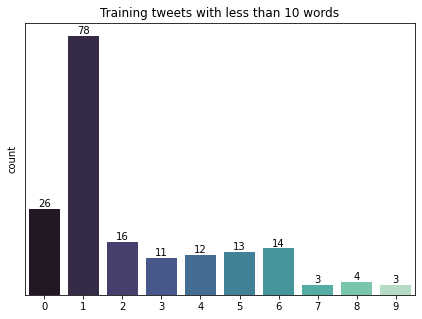

In [17]:
plt.figure(figsize=(7,5))
ax = sns.countplot(x='text_len', data=df[df['text_len']<10], palette='mako')
plt.title('Training tweets with less than 10 words')
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

Length of the DataFrame **before** elimination

In [18]:
print(f" DF SHAPE: {df.shape}")

 DF SHAPE: (889, 8)


In [19]:
df = df[df['text_len'] > 4]

Length of the DataFrame **after** elimination

In [20]:
print(f" DF SHAPE: {df.shape}")

 DF SHAPE: (746, 8)


# Deep Cleaning
Let's tokenize the tweets to see if there are any non-English ones!!

In [21]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [22]:
token_lens = []

for txt in df['text_clean'].values:
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
    
max_len=np.max(token_lens)

In [23]:
print(f"MAX TOKENIZED SENTENCE LENGTH: {max_len}")

MAX TOKENIZED SENTENCE LENGTH: 51


In [24]:
token_lens = []

for i,txt in enumerate(df['text_clean'].values):
    tokens = tokenizer.encode(txt, max_length=512, truncation=True)
    token_lens.append(len(tokens))
    if len(tokens)>80:
        print(f"INDEX: {i}, TEXT: {txt}")  

In [25]:
df['token_lens'] = token_lens

In [26]:
df = df.sort_values(by='token_lens', ascending=False)
df.head(20)

,tweet_id,text,favorite_count,retweet_count,created_at,sentiment,text_clean,text_len,token_lens
799,1603549863588683776,⁦@AbrahamHicks⁩ oh how I love this Yniverse! ...,0,0,Fri Dec 16 00:37:34 +0000 2022,positive,oh how i love this yniverse yyytttttyk cxx rhh...,10,51
758,1603687407718916101,"RT @TheSecretLawofA: ""You've got to offer a si...",0,1,Fri Dec 16 09:44:07 +0000 2022,negative,youve got to offer a signal about what you wan...,21,44
196,1605020198569918470,"""You've got to offer a signal about what you w...",1,0,Tue Dec 20 02:00:09 +0000 2022,negative,youve got to offer a signal about what you wan...,20,43
795,1603555538817671170,"""Don't go looking for your path. Prepare yours...",6,0,Fri Dec 16 01:00:07 +0000 2022,neutral,dont go looking for your path prepare yourself...,17,38
402,1604582300913750016,"""How you get the missing piece is by not focus...",2,1,Sun Dec 18 21:00:06 +0000 2022,negative,how you get the missing piece is by not focusi...,21,38
323,1604741400612212737,"RT @TheSecretLawofA: ""How you get the missing ...",0,1,Mon Dec 19 07:32:19 +0000 2022,negative,how you get the missing piece is by not focusi...,21,38
248,1604914503933624320,"""Don't go looking for your path. Prepare yours...",2,0,Mon Dec 19 19:00:10 +0000 2022,neutral,dont go looking for your path prepare yourself...,17,38
998,1602974765861437440,"RT @TheSecretLawofA: ""If you don't meet resist...",0,2,Wed Dec 14 10:32:20 +0000 2022,neutral,if you dont meet resistance with resistance it...,17,34
855,1603403005033943048,Any #Lovers from my #Vortex here today? Don't ...,0,0,Thu Dec 15 14:54:00 +0000 2022,negative,any lovers from my voex here today dont be shy...,20,34
718,1603791424386142208,Vortex of creation is where you live and rest ...,1,0,Fri Dec 16 16:37:27 +0000 2022,positive,voex of creation is where you live and rest is...,20,34


****Looking at the clean text column, there aren't any non-english tweets luckily, so we won't perform andy deeper cleaning for now! But if there was, we would be running the code below to discard those first n rows!!

In [ ]:
#df = df.iloc[n:] # change the n, number of first rows to be deleted, according to the cell above

# Converting into CSV
**Now you have a clean dataset! Congragulations, you've made it this far. Now, run the cell below to convert it into a CSV file!**

In [ ]:
df.to_csv('tweet_data.csv')

-----------------------------------------

**If you want to keep going, let's look at the data to get some intuition !!**

We want to see the most used words but **we don't want stopwords like "I, to, and, but..." to be present in our analysis**. We'll first discard them, then look at the most used words.

In [27]:
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]

In [28]:
df['temp_list'] = df['text_clean'].apply(lambda x:str(x).split())
df['temp_list'] = df['temp_list'].apply(lambda x:remove_stopword(x))
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,want,131
1,get,81
2,dont,76
3,good,70
4,youre,65
5,time,52
6,things,52
7,abrahamhicks,50
8,feel,48
9,universe,48


In [29]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Clean Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [30]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

Now let's do the same thing, but not on the whole dataset.
This time we will be analyzing 

* Positive
* Negative
* Neutral 

tweets seperately and see what are the most common words in those subsets!

In [31]:
Positive_sent = df[df['sentiment']=='positive']
Negative_sent = df[df['sentiment']=='negative']
Neutral_sent = df[df['sentiment']=='neutral']

# Most common positive words

In [32]:
top = Counter([item for sublist in Positive_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,good,68
1,want,62
2,youre,45
3,get,41
4,things,39
5,dont,35
6,universe,29
7,happy,28
8,im,28
9,really,28


In [33]:
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Positive Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

# Most common negative words

In [34]:
top = Counter([item for sublist in Negative_sent['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

,Common_words,count
1,get,15
2,reality,12
3,absence,9
4,words,9
5,easier,9
6,control,9
7,way,8
8,negative,7
9,conditions,7
10,one,6


In [35]:
fig = px.bar(temp_negative, x="count", y="Common_words", title='Most Commmon Negative Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

# Most common Neutral words

In [36]:
top = Counter([item for sublist in Neutral_sent['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Blues')

,Common_words,count
1,dont,36
2,time,29
3,get,25
4,youre,20
5,feel,20
6,like,19
7,abrahamhicks,18
8,thought,17
9,source,17
10,vibrational,16


In [37]:
fig = px.bar(temp_neutral, x="count", y="Common_words", title='Most Commmon Neutral Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

**Let's check if there any imbalances in our data regarding the sentiment category.**

In [38]:
temp = df.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,text
2,positive,448
1,neutral,231
0,negative,67


<AxesSubplot:xlabel='sentiment', ylabel='count'>

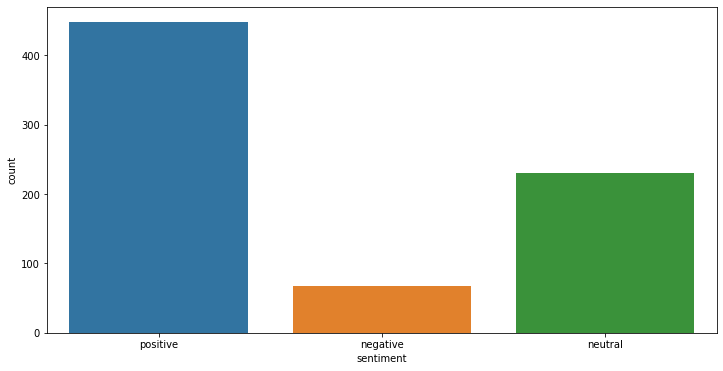

In [40]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

In [41]:
fig = go.Figure(go.Funnelarea(
    text =temp.sentiment,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

# Final Note
**As you can see, sentiment distrubition is unbalanced. We can do various things as a solution but let's end this notebook here.**

**Now you can have your own dataset to start your own SENTIMENT ANALYSIS PROJET!**

**How exciting! Good luck!**